In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
def van_der_pol(y1, y2, mu):
    return (y2, mu*(1-(y1**2))*y2 - y1)

OverflowError: (34, 'Result too large')

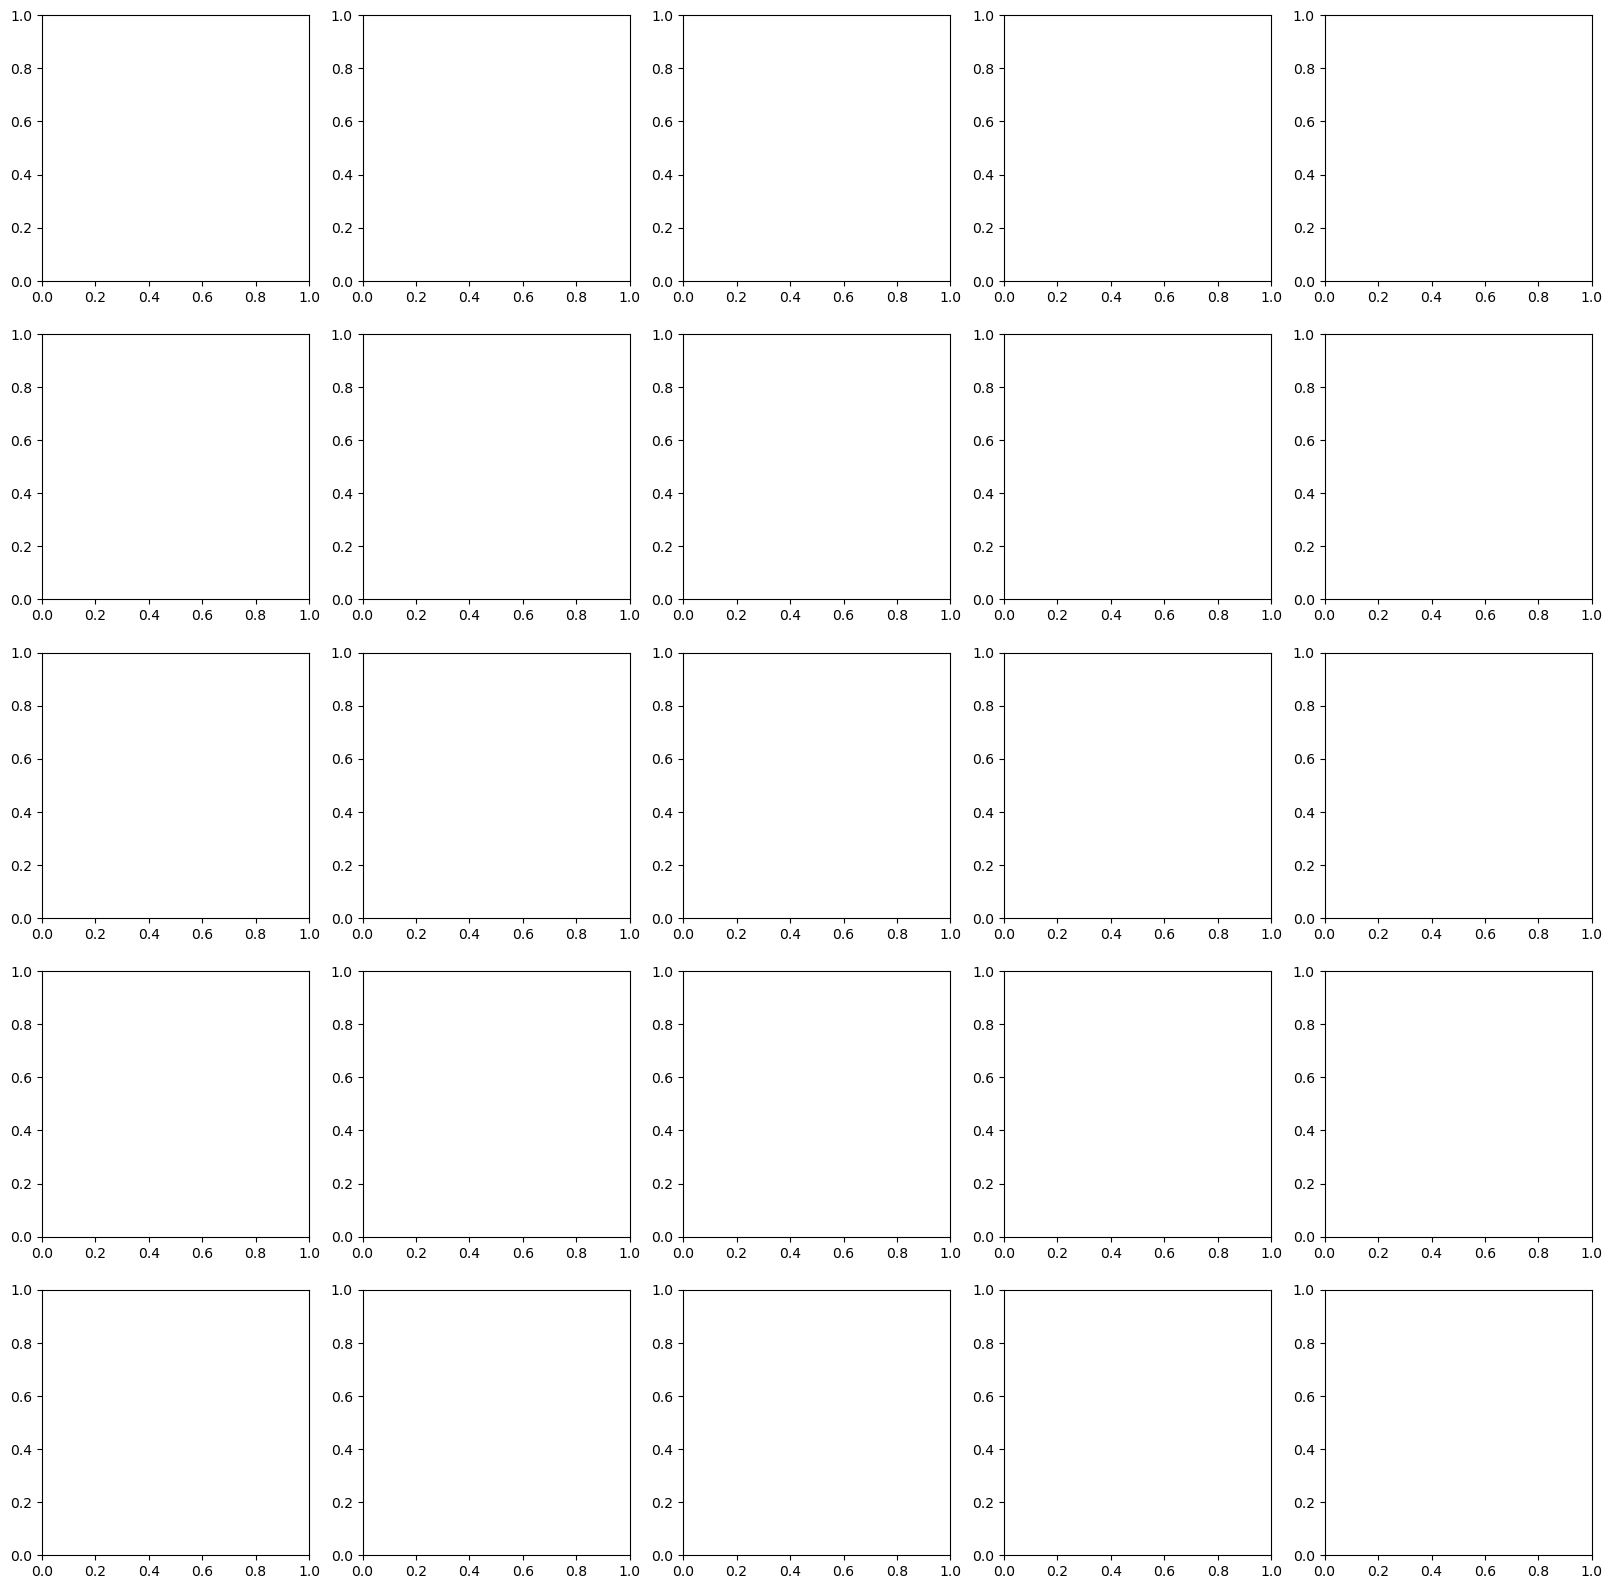

In [29]:
def euler(f, mu, y1_0, y2_0, Dt, tmax):
    y1 = [y1_0]
    y2 = [y2_0]
    t = [0]

    while t[-1] < tmax:
        t.append(t[-1] + Dt)
        Dv = f(y1[-1], y2[-1], mu)
        y1.append(y1[-1] + Dt * Dv[0])
        y2.append(y2[-1] + Dt * Dv[1])
    
    return (t, y1, y2)

Dt = 0.01
tmax = 20

mu = (-2, -1, 1, 2, 5)
initial_conditions = ((-1, -1), (-1, 1), (1, -1), (1, 1))
fig, ax = plt.subplots(len(mu), 1 + len(initial_conditions), figsize = (20, 20))
for (m, mu) in enumerate(mu):
    for (n, (y1_0, y2_0)) in enumerate(initial_conditions):
        t, y1, y2 = euler(van_der_pol, mu, y1_0, y2_0, Dt, tmax)
        ax[m, n].plot(t, y1)
        ax[m, n].plot(t, y2)
        ax[m, len(initial_conditions)].plot(y1, y2)

for i in range(len(ax)):
    for a in ax[i, 1:]:
        a.sharey(ax[i, 0])